**Heart Failure Predictor**
<br> By: Xinya Lu, Leo Tang, Cheng Zhang, Eric Zhang

Heart failure is a recurring condition where the heart muscles cannot pump enough blood to different parts of the body. Blood is essential to life as it is the fluid that carries all the necessary nutrients needed for our cells to function. When heart failure occurs, the heart pumps less blood and the organs in one’s body start to malfunction. There are many factors that can increase the chance of death due to heart failure. These factors include: 

**Age**: Aging can cause one’s blood vessels and heart to change negatively; for example, at older ages, the heart tends to pump blood at a slower rate during physical activity,causing heart failure to occur.
<br>**Creatine phosphokinase (CPK)**:  An enzyme in the body; when CPK level is very high, there may be an injury or stress to the heart.
<br>**Platelets**: Cell fragments in blood;  too low or too high amount of platelets means there may have been diseases in the body that weaken the heart. 
<br>**Serum creatinine**: Level of serum creatinine in the blood(mg/dL). People with high serum creatinine levels have reduced cardiac output, leading to the reduction of renal blood flow. This reduces one’s ability to get treatment for heart failure. 
<br>**Serum sodium**: Level of serum sodium in the blood(mEq/L). People with heart failure may have a lower serum sodium level.
<br>**Ejection fraction**: Percentage of blood leaving the heart each contraction. A lower percentage indicates organs might not get enough blood. 

The dataset we will be using is from: "https://archive.ics.uci.edu/ml/datasets/Heart+failure+clinical+records ". This dataset includes observations of 299 patients, including the above factors and if they survived heart failure (0  means survived, 1 means died). We will use this dataset to predict if the person we described will survive heart failure.

**Question: Will a 60 year old male with 100 mcg/L CPK, ejection fraction of 40%, 1 mg/dL of serum creatinine, 135 mg/dL of serum sodium, and 265000 kilo platelets/mL survive a heart failure?)**


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [8]:
heart_failure_data <- read_csv("heart_failure_clinical_records_dataset.csv", col_types="ddddddddddddc")
heart_failure_data

age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
75,0,582,0,20,1,265000,1.90,130,1,0,4,1
55,0,7861,0,38,0,263358,1.10,136,1,0,6,1
65,0,146,0,20,0,162000,1.30,129,1,1,7,1
50,1,111,0,20,0,210000,1.90,137,1,0,7,1
65,1,160,1,20,0,327000,2.70,116,0,0,8,1
90,1,47,0,40,1,204000,2.10,132,1,1,8,1
75,1,246,0,15,0,127000,1.20,137,1,0,10,1
60,1,315,1,60,0,454000,1.10,131,1,1,10,1
65,0,157,0,65,0,263358,1.50,138,0,0,10,1


**Tidy/wrangled data**

In [12]:
heart_split <- initial_split(heart_failure_data, prop=0.75, strata=DEATH_EVENT)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

In [13]:
heart_failure <- select(heart_train, age, serum_creatinine, serum_sodium,
                        creatinine_phosphokinase, platelets, ejection_fraction, DEATH_EVENT)
names(heart_failure) <- c('age','serum_creatinine','serum_sodium','creatinine_phosphokinase','platelets','ejection_fraction', 'DEATH_EVENT') 
heart_failure

age,serum_creatinine,serum_sodium,creatinine_phosphokinase,platelets,ejection_fraction,DEATH_EVENT
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
55,1.10,136,7861,263358,38,1
65,1.30,129,146,162000,20,1
50,1.90,137,111,210000,20,1
75,1.20,137,246,127000,15,1
60,1.10,131,315,454000,60,1
65,1.50,138,157,263358,65,1
80,9.40,133,123,388000,35,1
75,4.00,131,81,368000,38,1
50,1.10,137,168,276000,38,1


**Summary of Our Data**

In [14]:
heart_failure_summary <- heart_failure %>% 
                      summarize(n_observations = nrow(heart_failure),
                      average_age = mean(age, na.rm = TRUE),
                      average_creatinine_phosphokinase = mean(creatinine_phosphokinase, na.rm = TRUE),
                      average_platelets = mean(platelets, na.rm = TRUE),
                      average_serum_creatinine = mean(serum_creatinine, na.rm=TRUE),
                      average_serum_sodium = mean(serum_sodium, na.rm=TRUE),
                      average_ejection_fraction = mean(ejection_fraction, na.rm=TRUE))
heart_failure_summary

n_observations,average_age,average_creatinine_phosphokinase,average_platelets,average_serum_creatinine,average_serum_sodium,average_ejection_fraction
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
225,60.28296,552.48,266183.4,1.415822,136.88,37.83111


**Visualizing data**
<br> Shows one of the variables, ejection fraction, and how many people died (0 means alive, 1 means dead) for each ejection fraction. This shows how ejection fraction can be a predictor of if someone with heart hailure would die or not.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



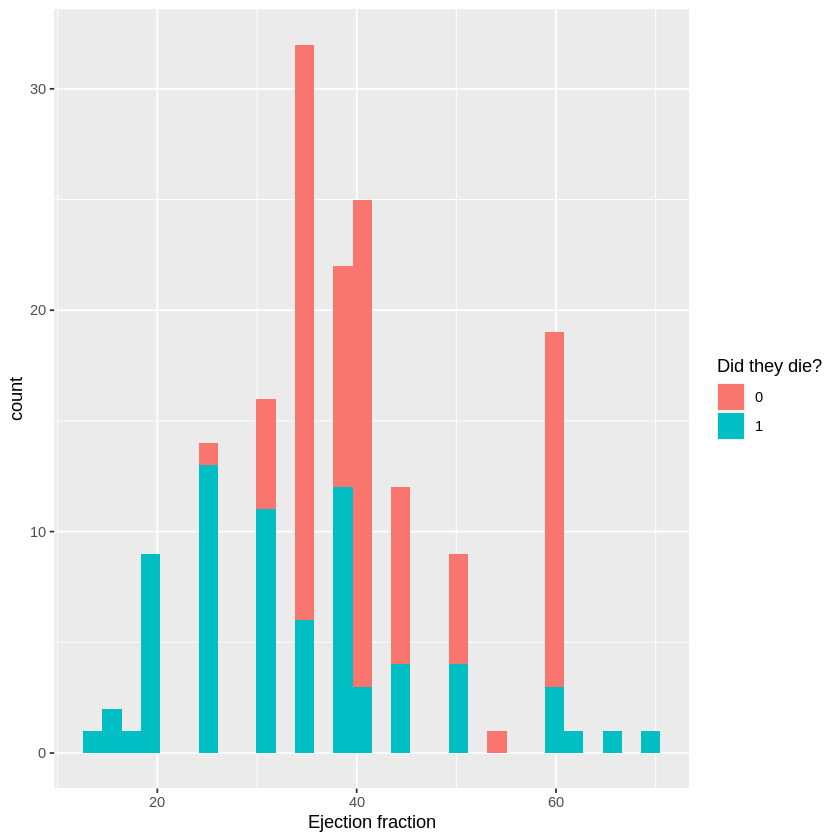

In [15]:
heart_failure_plot <- ggplot(heart_train, aes(x = ejection_fraction, fill = DEATH_EVENT)) +
    geom_histogram(position="identity") +
    xlab("Ejection fraction") +
    labs(fill = "Did they die?")
heart_failure_plot